<a href="https://colab.research.google.com/github/Ktiscar1/Healthcare-Insurance/blob/main/HealtCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle Link: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data

# About Dataset
This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.
Age: The insured person's age.

Sex: Gender (male or female) of the insured.

BMI (Body Mass Index): A measure of body fat based on height and weight.

Children: The number of dependents covered.

Smoker: Whether the insured is a smoker (yes or no).

Region: The geographic area of coverage.

Charges: The medical insurance costs incurred by the insured person.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Importing the dataset

In [ ]:
from google.colab import files
upload = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
dataset = pd.read_csv('insurance.csv')


# Dateset Info

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.shape

(1338, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Check for Duplicates and Null Values

In [ ]:
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
#Number of unique values for each column
dataset.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


# Exploratory Data Analysis
Goal: Explore the underlying structure, patterns, relationships, and anomalies within the data, allowing to make informed decisions and develop appropiate models or strategies for further analysis.


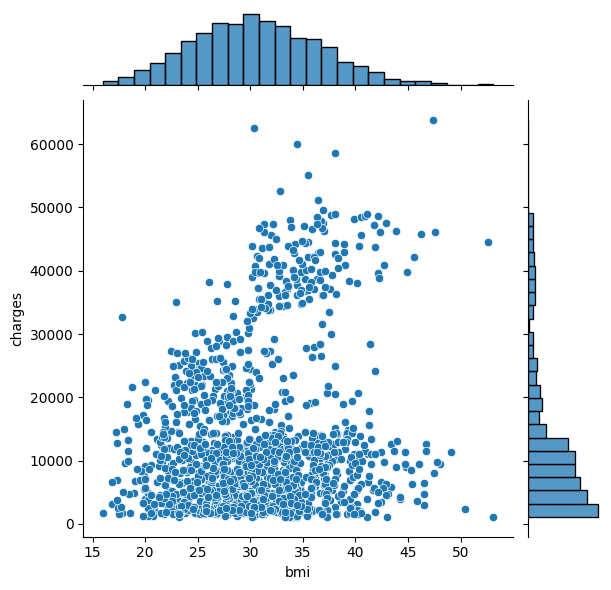

In [ ]:
sns.jointplot(data=dataset, x='bmi', y='charges')

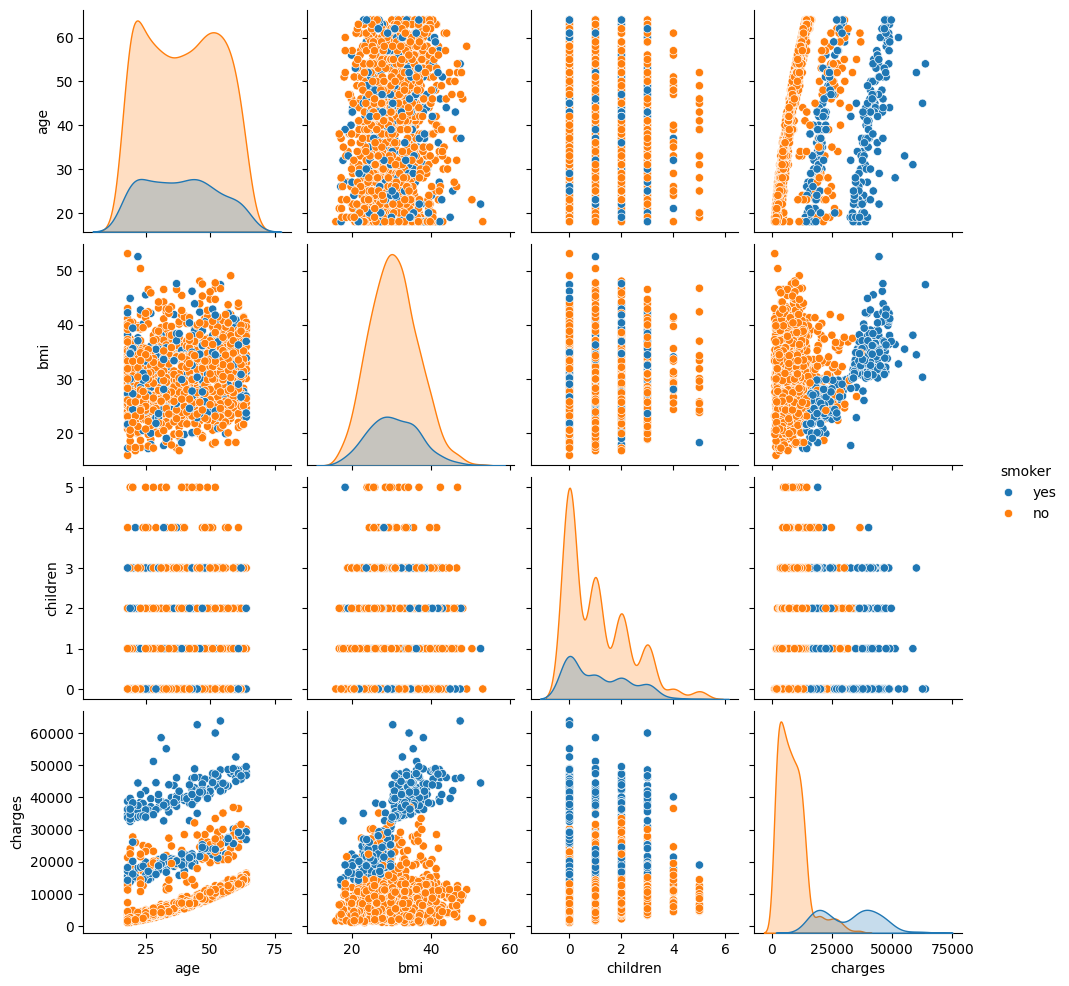

In [ ]:
sns.pairplot(data=dataset, hue='smoker')

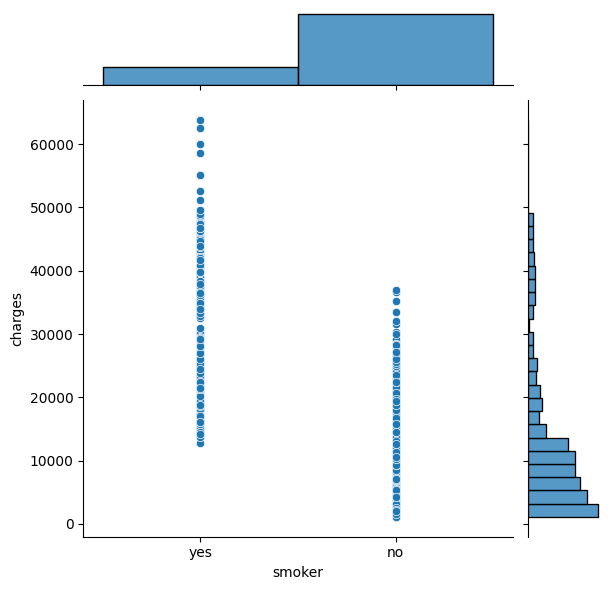

In [ ]:
sns.jointplot(data=dataset, x='smoker', y='charges')

[Text(0, 0, '274'), Text(0, 0, '1064')]

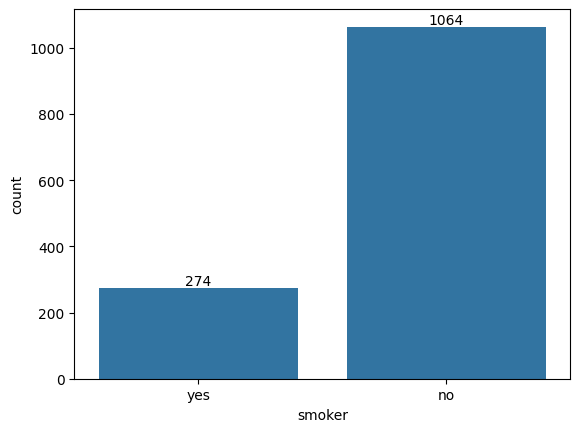

In [ ]:
axes = sns.countplot(data=dataset, x='smoker')
axes.bar_label(axes.containers[0]) #Add count label / 274 - 1064

<Axes: xlabel='age', ylabel='Count'>

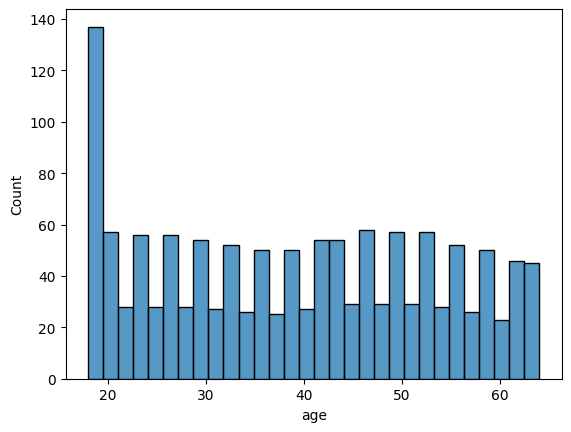

In [ ]:
sns.histplot(dataset['age'], bins=30) #| sns.displot(dataset['age'], bins=30)

# Data For Analysis

In [ ]:
# Transform each column into binary values
pd.get_dummies(dataset['sex'])

,female,male
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
1333,False,True
1334,True,False
1335,True,False
1336,True,False


In [ ]:
male = pd.get_dummies(dataset['sex'], drop_first=True)
male

,male
0,False
1,True
2,True
3,True
4,True
...,...
1333,True
1334,False
1335,False
1336,False


In [ ]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
pd.get_dummies(dataset['region'])

,northeast,northwest,southeast,southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1333,False,True,False,False
1334,True,False,False,False
1335,False,False,True,False
1336,False,False,False,True


In [ ]:
region = pd.get_dummies(dataset['region'], drop_first=True)
region

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1333,True,False,False
1334,False,False,False
1335,False,True,False
1336,False,False,True


In [ ]:
pd.get_dummies(dataset['smoker'])

,no,yes
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
1333,True,False
1334,True,False
1335,True,False
1336,True,False


In [ ]:
# Only show smokers
smoke = pd.get_dummies(dataset['smoker'], drop_first=True)
smoke

,yes
0,True
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


In [ ]:
dataset1 = pd.concat([dataset, region, male, smoke], axis=1)
dataset1.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,False,False,True,False,True
1,18,male,33.770,1,no,southeast,1725.55230,False,False,True,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,False,False,True,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,False,True,False,False,True,False
4,32,male,28.880,0,no,northwest,3866.85520,False,True,False,False,True,False


In [ ]:
dataset1.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)
dataset1.head()

,age,bmi,children,charges,northeast,northwest,southeast,southwest,male,yes
0,19,27.900,0,16884.92400,False,False,False,True,False,True
1,18,33.770,1,1725.55230,False,False,True,False,True,False
2,28,33.000,3,4449.46200,False,False,True,False,True,False
3,33,22.705,0,21984.47061,False,True,False,False,True,False
4,32,28.880,0,3866.85520,False,True,False,False,True,False


In [ ]:
dataset1.drop(['charges'], axis=1)

,age,bmi,children,northeast,northwest,southeast,southwest,male,yes
0,19,27.900,0,False,False,False,True,False,True
1,18,33.770,1,False,False,True,False,True,False
2,28,33.000,3,False,False,True,False,True,False
3,33,22.705,0,False,True,False,False,True,False
4,32,28.880,0,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,False,False,True,False
1334,18,31.920,0,True,False,False,False,False,False
1335,18,36.850,0,False,False,True,False,False,False
1336,21,25.800,0,False,False,False,True,False,False


# Linear Regression

In [ ]:
x = dataset1.drop(['charges'], axis=1)
y = dataset1['charges']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predicted value of the dependeneeet variable when the independent variable are 0
lr.intercept_

np.float64(-12888.63467975503)

In [ ]:
# Coefficient of the features of the dataset
lr.coef_

array([  244.50658439,   364.9511794 ,   413.00106659,   424.39285597,
         525.22500931,  -489.50346843,  -460.11439685,   108.74384641,
       23655.83796541])

In [ ]:
prediction = lr.predict(x_test)
prediction

array([10870.1944927 ,  2931.00956297, 10552.51567371, 27006.85847048,
        6216.46537304,   435.84815599, 15346.22045379,  3968.90411373,
       11162.77917975,  6826.31516327,  8228.43994448, 10752.07010885,
        6493.16868789, 12750.67606087, 30972.77228568, 36900.78120104,
       10488.62527205,  2871.23239228, 15159.89602534, 13820.53590276,
       30077.91555121,  7351.38487978, 12740.73649161,  5913.04211057,
         470.51851803, 25134.8518974 , 12193.48072537, 27390.20736285,
       37879.6989273 ,  4478.70241246,  6057.81828673,  7238.28213158,
        3554.81585714,  2545.81224213,  5715.91485337,  5965.34699386,
         335.76084422, 12339.02151423, 13784.37910081, 11013.52985855,
       10292.80573926,  9627.9173202 , 14866.10427165, 10325.69750784,
        6312.6243494 ,  6168.4221984 ,  8244.90205016,  2131.35276428,
       12719.76653888,  2212.00221052, -1450.95921631,  2464.19984494,
        7271.86578049,  8672.32977973,  4309.78778387, 14275.06733065,
      

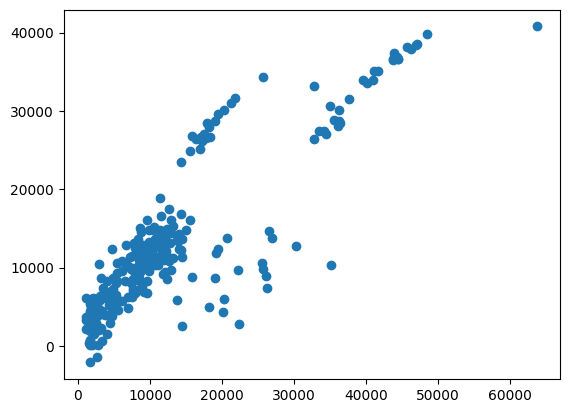

In [ ]:
plt.scatter(y_test, prediction)

In [ ]:
metrics.explained_variance_score(y_test, prediction)

0.7611973625526149

<Axes: >

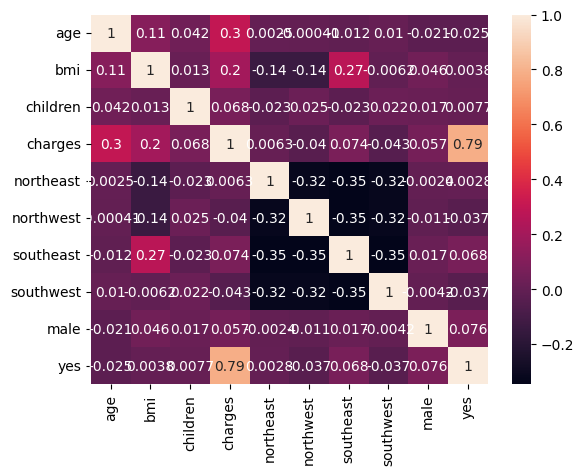

In [ ]:
sns.heatmap(dataset1.corr(), annot=True)